# Two Layer Network

主要 参考 http://blog.csdn.net/xieyi4650/article/details/53465742

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from classifiers.neural_net import TwoLayerNet

from __future__ import print_function

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # 设置 size
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# notebook 会 reload外部python modules
%load_ext autoreload 
%autoreload 2

In [3]:
def rel_error(x, y):
    """ returns relative error"""
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [4]:
### 创建 small net 和 small data ，用于 check code 是否能运行

input_size = 4 
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_dev_model():
    np.random.seed()
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_dev_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y


net = init_dev_model()
X, y = init_dev_data()

In [5]:
print(y) 
print(X) 

[0 1 2 2 1]
[[ 16.24345364  -6.11756414  -5.28171752 -10.72968622]
 [  8.65407629 -23.01538697  17.44811764  -7.61206901]
 [  3.19039096  -2.49370375  14.62107937 -20.60140709]
 [ -3.22417204  -3.84054355  11.33769442 -10.99891267]
 [ -1.72428208  -8.77858418   0.42213747   5.82815214]]


# Forward pass: compute scores

In [6]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[ 0.8355744  -0.2758127   0.29660467]
 [ 1.43861469 -0.09737981  0.08681508]
 [ 0.93102189 -0.47561699  0.12792691]
 [ 0.59211908 -0.29310864  0.03914305]
 [ 0.09829716  0.17426112 -0.07292176]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
11.8624036838


# Forward pass: compute loss

In [7]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
0.0555509386925


# Backward pass

In [8]:
from gradient_check import eval_numerical_gradient


loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 7.209750e-10
b1 max relative error: 9.088283e-10
W1 max relative error: 3.908475e-09
b2 max relative error: 6.383572e-11


In [9]:
print (X)

[[ 16.24345364  -6.11756414  -5.28171752 -10.72968622]
 [  8.65407629 -23.01538697  17.44811764  -7.61206901]
 [  3.19039096  -2.49370375  14.62107937 -20.60140709]
 [ -3.22417204  -3.84054355  11.33769442 -10.99891267]
 [ -1.72428208  -8.77858418   0.42213747   5.82815214]]


# Train the network  on dev set

iteration 0 / 300: loss 1.713326
iteration 100 / 300: loss 0.011326
iteration 200 / 300: loss 0.011831
Final training loss:  0.0120593242297


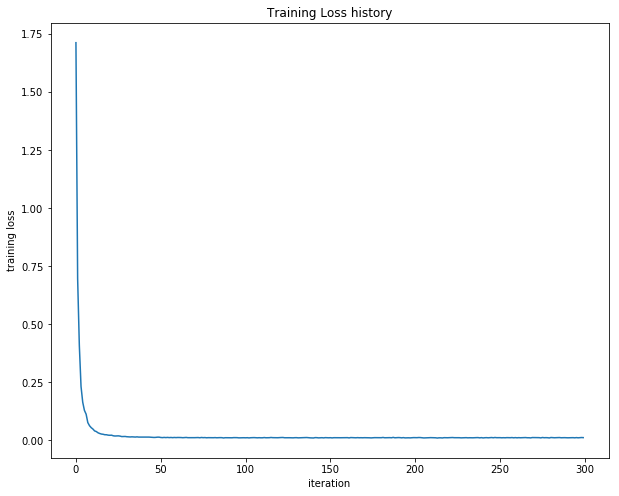

In [10]:
net = init_dev_model()
X, y = init_dev_data()

stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=300, verbose=True)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()


# Load the data

In [11]:
from data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'datasets/cifar-10-batches-py/'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network  on train set

In [12]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 1000: loss 2.302800
iteration 100 / 1000: loss 2.302314
iteration 200 / 1000: loss 2.298243
iteration 300 / 1000: loss 2.252089
iteration 400 / 1000: loss 2.170129
iteration 500 / 1000: loss 2.173005
iteration 600 / 1000: loss 2.072319
iteration 700 / 1000: loss 2.046983
iteration 800 / 1000: loss 2.071935
iteration 900 / 1000: loss 2.030331
Validation accuracy:  0.282


# Debug the training

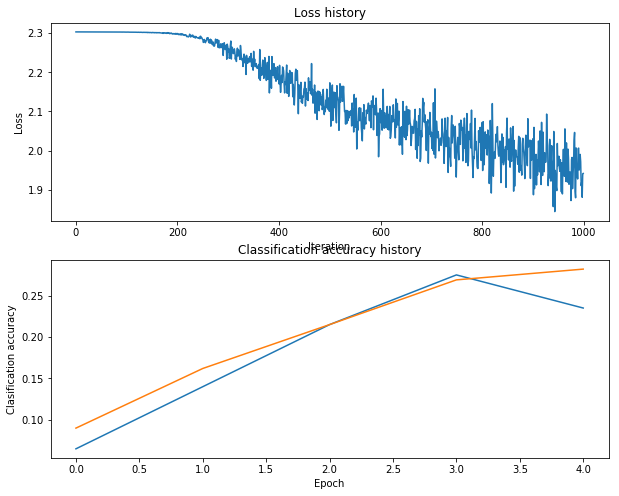

In [23]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')


plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

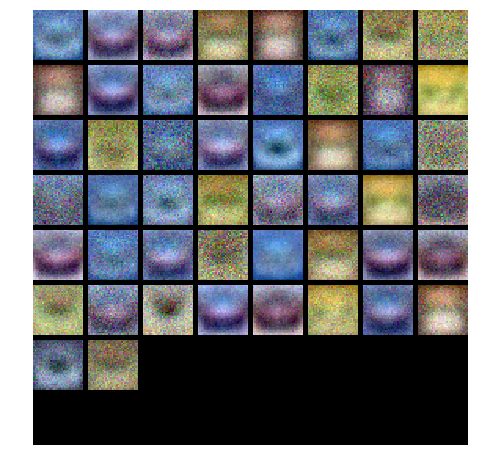

In [14]:
from vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

In [15]:
best_net = None # store the best model into this 


best_acc = -1
input_size = 32 * 32 * 3

best_stats = None

#hidden_size_choice = [x*100+50 for x in xrange(11)]
#reg_choice = [0.1, 0.5, 5, 15, 50, 100, 1000]
#learning_rate_choice = [1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 1e-1, 1]
#batch_size_choice = [8, 40, 80, 160, 500, 1000]


hidden_size_choice = [400]
learning_rate_choice = [3e-3]
reg_choice = [0.1]
batch_size_choice =[500]

num_iters_choice = [1200]

for batch_size_curr in batch_size_choice:
    for reg_cur in reg_choice:
        for learning_rate_curr in learning_rate_choice:
            for hidden_size_curr in hidden_size_choice:
                for num_iters_curr in num_iters_choice:
                    print ()
                    print( "current training hidden_size:",hidden_size_curr)
                    print( "current training learning_rate:",learning_rate_curr)
                    print( "current training reg:",reg_cur)
                    print( "current training batch_size:",batch_size_curr)
                    net = TwoLayerNet(input_size, hidden_size_curr, num_classes)
                    best_stats = net.train(X_train, y_train, X_val, y_val,
                            num_iters=num_iters_curr, batch_size=batch_size_curr,
                            learning_rate=learning_rate_curr, learning_rate_decay=0.95,
                            reg=reg_cur, verbose=True)
                    val_acc = (net.predict(X_val) == y_val).mean()
                    print( "current val_acc:",val_acc)
                    if val_acc>best_acc:
                        best_acc = val_acc
                        best_net = net
                        best_stats = stats
                        print ()
                        print ("best_acc:",best_acc)
                        print( "best hidden_size:",best_net.params['W1'].shape[1])
                        print ("best learning_rate:",best_net.hyper_params['learning_rate'])
                        print( "best reg:",best_net.hyper_params['reg'])
                        print ("best batch_size:",best_net.hyper_params['batch_size'])
                        print ()

current training hidden_size: 400
current training learning_rate: 0.003
current training reg: 0.02
current training batch_size: 500
iteration 0 / 1200: loss 2.302722
iteration 100 / 1200: loss 1.720785
iteration 200 / 1200: loss 1.622085
iteration 300 / 1200: loss 1.521877
iteration 400 / 1200: loss 1.489314
iteration 500 / 1200: loss 1.408021
iteration 600 / 1200: loss 1.404960
iteration 700 / 1200: loss 1.246262
iteration 800 / 1200: loss 1.374054
iteration 900 / 1200: loss 1.286155
iteration 1000 / 1200: loss 1.180478
iteration 1100 / 1200: loss 1.244753
current val_acc: 0.497
best_acc: 0.497
best hidden_size: 400
best learning_rate: 0.003
best reg: 0.02
best batch_size: 500

current training hidden_size: 400
current training learning_rate: 0.003
current training reg: 0.05
current training batch_size: 500
iteration 0 / 1200: loss 2.302885
iteration 100 / 1200: loss 1.729393
iteration 200 / 1200: loss 1.597349
iteration 300 / 1200: loss 1.428205
iteration 400 / 1200: loss 1.433319
it

In [16]:
#在上面调好的范围内微调
test_net = TwoLayerNet(input_size, 450, num_classes)
test_stats = test_net.train(X_train, y_train, X_val, y_val,
                       num_iters=1800, batch_size=500,
                       learning_rate=2e-3, learning_rate_decay=0.95,
                       reg=0.02, verbose=True)
test_val_acc = (test_net.predict(X_val) == y_val).mean()
print ()
print ("test_acc:",test_val_acc)
print( "test hidden_size:",test_net.hyper_params['hidden_size'])
print ("test learning_rate:",test_net.hyper_params['learning_rate'])
print ("test reg:",test_net.hyper_params['reg'])
print ("test batch_size:",test_net.hyper_params['batch_size'])
print( "test num_iter:",test_net.hyper_params['num_iter'])

iteration 0 / 1800: loss 2.302723
iteration 100 / 1800: loss 1.687978
iteration 200 / 1800: loss 1.547796
iteration 300 / 1800: loss 1.578567
iteration 400 / 1800: loss 1.417946
iteration 500 / 1800: loss 1.426620
iteration 600 / 1800: loss 1.350756
iteration 700 / 1800: loss 1.321561
iteration 800 / 1800: loss 1.230199
iteration 900 / 1800: loss 1.214980
iteration 1000 / 1800: loss 1.203346
iteration 1100 / 1800: loss 1.199552
iteration 1200 / 1800: loss 1.094829
iteration 1300 / 1800: loss 1.175930
iteration 1400 / 1800: loss 1.185743
iteration 1500 / 1800: loss 1.074668
iteration 1600 / 1800: loss 1.084929
iteration 1700 / 1800: loss 1.043838

test_acc: 0.533
test hidden_size: 450
test learning_rate: 0.002
test reg: 0.02
test batch_size: 500
test num_iter: 1800


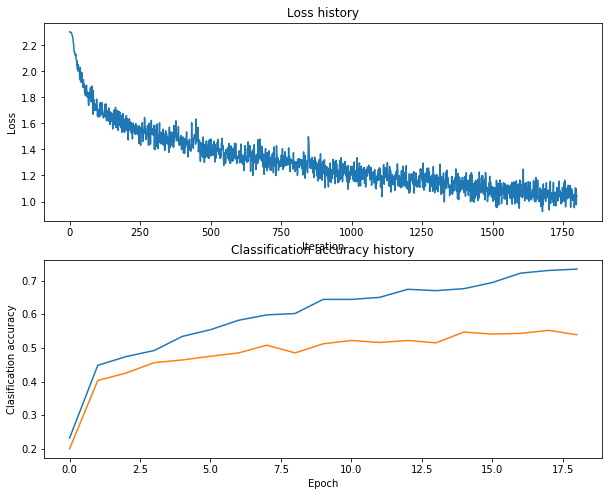

In [17]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(test_stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(test_stats['train_acc_history'], label='train')
plt.plot(test_stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

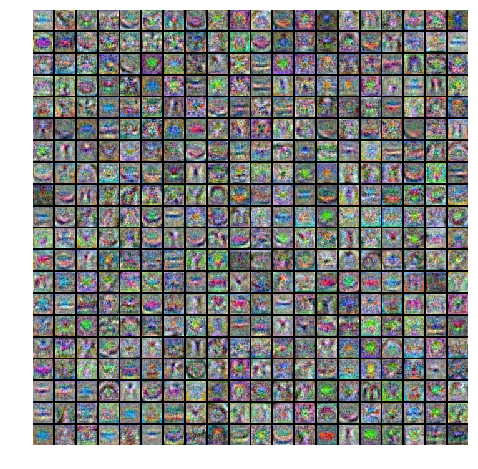

best hidden_size: 400
learning_rate 0.003
reg 0.1
batch_size 500


In [18]:
# visualize the weights of the best network
show_net_weights(best_net)

print ("best hidden_size:",best_net.hyper_params['hidden_size'])
print ("learning_rate",best_net.hyper_params['learning_rate'])
print ("reg",best_net.hyper_params['reg'])
print ("batch_size",best_net.hyper_params['batch_size'])

# Evaluate on the test set

In [19]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.524
